<a href="https://colab.research.google.com/github/brenaSF/LH_CD_BrenaFreitas/blob/main/LH_CD_BrenaFreitas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio - Indicium Precificação EDA
Objetivo é desenvolver um modelo de previsão de preços a partir do dataset oferecido, e avaliar tal modelo utilizando as métricas de avaliação que mais fazem sentido para o problema.

## Importação de bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

## Pré-processamento



In [ ]:
data = pd.read_csv("teste_indicium_precificacao.csv")

In [ ]:
data.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [ ]:
data.count()

id                               48894
nome                             48878
host_id                          48894
host_name                        48873
bairro_group                     48894
bairro                           48894
latitude                         48894
longitude                        48894
room_type                        48894
price                            48894
minimo_noites                    48894
numero_de_reviews                48894
ultima_review                    38842
reviews_por_mes                  38842
calculado_host_listings_count    48894
disponibilidade_365              48894
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

### visualização das variáveis categóricas e numéricas

In [ ]:
# Frequência da ocorrência dos nomes dos diferentes locais para aluguel
frequencia_nome_local = data['nome'].value_counts()

frequencia_nome_local

Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Feel at Home                                           1
Spacious Modern Alcove Studio in a Luxury Building     1
Artist's Room in Large Apartment                       1
Modern Oasis in Central Park Slope                     1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: nome, Length: 47904, dtype: int64

In [ ]:
total_nomes_unicos = len(frequencia_nome_local)

print("Nomes de locais únicos :",total_nomes_unicos )

Nomes de locais únicos : 47904


In [ ]:
minimo = data['minimo_noites'] >= 400

In [ ]:
minimo

0        False
1        False
2        False
3        False
4        False
         ...  
48889    False
48890    False
48891    False
48892    False
48893    False
Name: minimo_noites, Length: 48894, dtype: bool

### dados faltantes/duplos

In [ ]:
valores_faltantes = data.isna().sum()
valores_faltantes

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

In [ ]:
 data.drop(['id', 'host_name','host_id'], axis=1, inplace=True)

In [ ]:
data = data.rename(columns={'bairro_group': 'bairro_grupo', 'room_type': 'tipo_quarto', 'price': 'preco', 'numero_de_reviews': 'numero_avaliacoes','calculado_host_listings_count':'contagem_listas_hosts'})

In [ ]:
data.head()

,nome,bairro_grupo,bairro,latitude,longitude,tipo_quarto,preco,minimo_noites,numero_avaliacoes,ultima_review,reviews_por_mes,contagem_listas_hosts,disponibilidade_365
0,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,Large Cozy 1 BR Apartment In Midtown East,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
5,BlissArtsSpace!,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0


In [ ]:
# Retirar valores nulos
data = data.dropna()

valores_faltantes_data = data.isna().sum()
valores_faltantes_data

nome                     0
bairro_grupo             0
bairro                   0
latitude                 0
longitude                0
tipo_quarto              0
preco                    0
minimo_noites            0
numero_avaliacoes        0
ultima_review            0
reviews_por_mes          0
contagem_listas_hosts    0
disponibilidade_365      0
dtype: int64

In [ ]:
#Verificar se há duplicatas

duplicatas = data.duplicated()

print(data[duplicatas])


Empty DataFrame
Columns: [nome, bairro_grupo, bairro, latitude, longitude, tipo_quarto, preco, minimo_noites, numero_avaliacoes, ultima_review, reviews_por_mes, contagem_listas_hosts, disponibilidade_365]
Index: []


In [ ]:
valores_ausentes = data.isnull().sum()
valores_ausentes

nome                     0
bairro_grupo             0
bairro                   0
latitude                 0
longitude                0
tipo_quarto              0
preco                    0
minimo_noites            0
numero_avaliacoes        0
ultima_review            0
reviews_por_mes          0
contagem_listas_hosts    0
disponibilidade_365      0
dtype: int64

### preço nulo

In [ ]:
menor_preco = data['preco'].min()

In [ ]:
indice_preco_zero = data['preco'].idxmin()
print("Índice onde o preço é zero:", indice_preco_zero)

posicoes_preco_minimo = data.loc[data['preco'] == menor_preco].index
print("Posições com preço mínimo:", posicoes_preco_minimo)




Índice onde o preço é zero: 22286
Posições com preço mínimo: Int64Index([22286, 22834, 23255, 24099, 27971, 31065, 31406, 32809, 33224,
            35385, 35600, 47217],
           dtype='int64')


In [ ]:
data = data[data['preco'] != 0]

In [ ]:
menor_preco = data['preco'].min()

print("menor preço:",menor_preco)

menor preço: 10


### one hot encoder


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
# criar uma instância one hot encoder
one_hot_encoder = OneHotEncoder()

# ajustar e transformar os dados
data_codificado = one_hot_encoder.fit_transform(data[['tipo_quarto']])

# converter a saída para dataframe
data_codificado_novo_DF = pd.DataFrame(data_codificado.toarray(), columns=one_hot_encoder.get_feature_names_out(['tipo_quarto']))

#concatenar
data_final = pd.concat([data, data_codificado_novo_DF], axis=1)

# mostrar dataframe
data_final.head()

,nome,bairro_grupo,bairro,latitude,longitude,tipo_quarto,preco,minimo_noites,numero_avaliacoes,ultima_review,reviews_por_mes,contagem_listas_hosts,disponibilidade_365,tipo_quarto_Entire home/apt,tipo_quarto_Private room,tipo_quarto_Shared room
0,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0,1.0,0.0,0.0
2,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0,1.0,0.0,0.0
3,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0,1.0,0.0,0.0
4,Large Cozy 1 BR Apartment In Midtown East,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74.0,2019-06-22,0.59,1.0,129.0,0.0,1.0,0.0
5,BlissArtsSpace!,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45.0,49.0,2017-10-05,0.40,1.0,0.0,0.0,1.0,0.0


In [ ]:
data_final = data_final.dropna(subset=['preco'])
data_final = data_final.dropna(subset=['tipo_quarto_Entire home/apt', 'tipo_quarto_Private room', 'tipo_quarto_Shared room'])
linhas_preco_faltante = data_final[data_final['preco'].isnull()]

print("Linhas onde o preço é faltante:")
print(linhas_preco_faltante)

Linhas onde o preço é faltante:
Empty DataFrame
Columns: [nome, bairro_grupo, bairro, latitude, longitude, tipo_quarto, preco, minimo_noites, numero_avaliacoes, ultima_review, reviews_por_mes, contagem_listas_hosts, disponibilidade_365, tipo_quarto_Entire home/apt, tipo_quarto_Private room, tipo_quarto_Shared room]
Index: []


In [ ]:
valores_ausentes2 = data_final.isnull().sum()
valores_ausentes2

nome                           0
bairro_grupo                   0
bairro                         0
latitude                       0
longitude                      0
tipo_quarto                    0
preco                          0
minimo_noites                  0
numero_avaliacoes              0
ultima_review                  0
reviews_por_mes                0
contagem_listas_hosts          0
disponibilidade_365            0
tipo_quarto_Entire home/apt    0
tipo_quarto_Private room       0
tipo_quarto_Shared room        0
dtype: int64

In [ ]:
data_final.count()

nome                           32476
bairro_grupo                   32476
bairro                         32476
latitude                       32476
longitude                      32476
tipo_quarto                    32476
preco                          32476
minimo_noites                  32476
numero_avaliacoes              32476
ultima_review                  32476
reviews_por_mes                32476
contagem_listas_hosts          32476
disponibilidade_365            32476
tipo_quarto_Entire home/apt    32476
tipo_quarto_Private room       32476
tipo_quarto_Shared room        32476
dtype: int64

## Análise Exploratória

### análise estatística

In [ ]:
 data_final.describe()


,latitude,longitude,preco,minimo_noites,numero_avaliacoes,reviews_por_mes,contagem_listas_hosts,disponibilidade_365,tipo_quarto_Entire home/apt,tipo_quarto_Private room,tipo_quarto_Shared room
count,32476.000000,32476.000000,32476.000000,32476.000000,32476.000000,32476.000000,32476.000000,32476.000000,32476.000000,32476.000000,32476.000000
mean,40.727951,-73.951922,139.999076,6.215390,33.675945,1.179075,3.560814,110.167170,0.524264,0.454459,0.021277
std,0.054905,0.045098,198.681690,18.413235,51.415309,1.509857,12.532579,129.546457,0.499419,0.497929,0.144309
min,40.508680,-74.239860,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,40.688180,-73.982060,69.000000,2.000000,3.000000,0.150000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,40.721430,-73.955130,100.000000,3.000000,12.000000,0.520000,1.000000,41.000000,1.000000,0.000000,0.000000
75%,40.763112,-73.936817,165.000000,4.000000,42.000000,1.720000,2.000000,221.000000,1.000000,1.000000,0.000000
max,40.908040,-73.712990,10000.000000,1250.000000,629.000000,19.750000,327.000000,365.000000,1.000000,1.000000,1.000000


### histograma

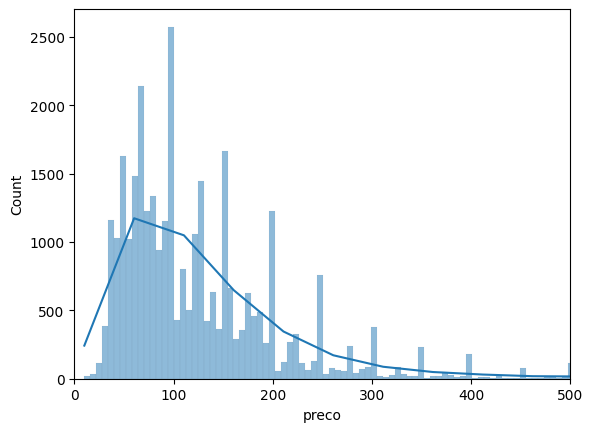

In [ ]:
# Histograma do preço
import seaborn as sns

xlim = (0, 500)

# Plote o histograma com os limites ajustados
sns.histplot(data=data_final, x="preco", kde=True)
plt.xlim(xlim)
plt.show()


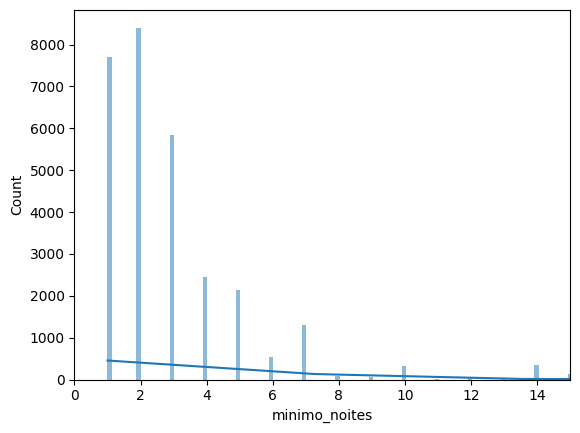

In [ ]:
# Histograma do dias minimos para reservar
import seaborn as sns

xlim = (0, 15)

sns.histplot(data=data_final, x="minimo_noites", kde=True)
plt.xlim(xlim)
plt.show()


### Correlação entre variáveis

In [ ]:
# Análise de correlação
correlacao_minimo_noites = data_final['minimo_noites'].corr(data_final['preco'])

print("Correlação entre número mínimo de noites e preço:", correlacao_minimo_noites)


Correlação entre número mínimo de noites e preço: 0.03046964897691709


In [ ]:
correlacao_disponibilidade = data_final['disponibilidade_365'].corr(data_final['preco'])

print("Correlação entre disponibilidade ao longo do ano e preço:", correlacao_disponibilidade)

Correlação entre disponibilidade ao longo do ano e preço: 0.06362004076841851


In [ ]:
correlacao = data_final.corr()

<ipython-input-50-0b22cf85eb46>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = data_final.corr()


In [ ]:
correlacao

,latitude,longitude,preco,minimo_noites,numero_avaliacoes,reviews_por_mes,contagem_listas_hosts,disponibilidade_365,tipo_quarto_Entire home/apt,tipo_quarto_Private room,tipo_quarto_Shared room
latitude,1.000000,0.093619,0.027610,0.026281,-0.007941,-0.019499,0.047100,-0.025938,0.002042,-0.001463,-0.002019
longitude,0.093619,1.000000,-0.144995,-0.055032,0.068092,0.150867,-0.049773,0.117322,0.001794,-0.002350,0.001902
preco,0.027610,-0.144995,1.000000,0.030470,-0.031876,-0.048190,0.031053,0.063620,-0.018982,0.018809,0.000793
minimo_noites,0.026281,-0.055032,0.030470,1.000000,-0.080939,-0.114392,0.171379,0.114673,0.007517,-0.007768,0.000790
numero_avaliacoes,-0.007941,0.068092,-0.031876,-0.080939,1.000000,0.719398,-0.071085,0.235128,0.028488,-0.023110,-0.018850
reviews_por_mes,-0.019499,0.150867,-0.048190,-0.114392,0.719398,1.000000,-0.069314,0.196223,-0.003484,0.001924,0.005418
contagem_listas_hosts,0.047100,-0.049773,0.031053,0.171379,-0.071085,-0.069314,1.000000,0.222012,-0.017034,0.016940,0.000502
disponibilidade_365,-0.025938,0.117322,0.063620,0.114673,0.235128,0.196223,0.222012,1.000000,0.015194,-0.012185,-0.010539
tipo_quarto_Entire home/apt,0.002042,0.001794,-0.018982,0.007517,0.028488,-0.003484,-0.017034,0.015194,1.000000,-0.958132,-0.154782
tipo_quarto_Private room,-0.001463,-0.002350,0.018809,-0.007768,-0.023110,0.001924,0.016940,-0.012185,-0.958132,1.000000,-0.134574


<Axes: >

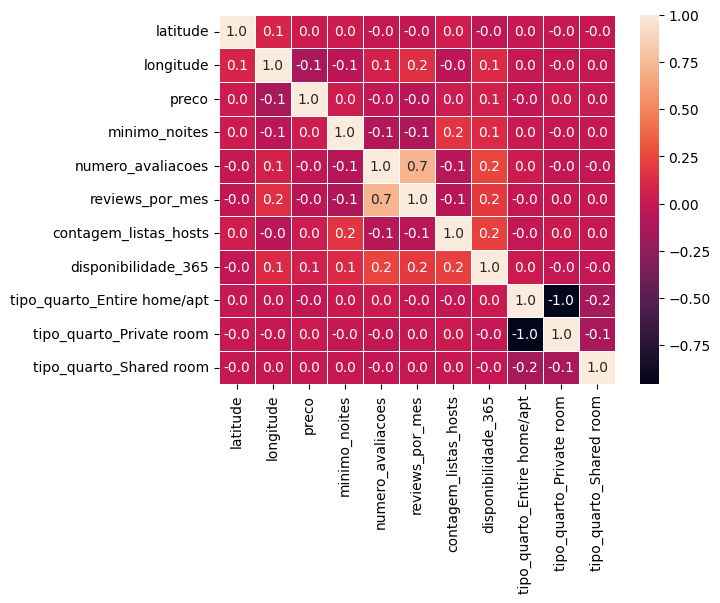

In [ ]:
plot = sn.heatmap(correlacao, annot = True, fmt=".1f", linewidths=.6)
plot

Ao observar a matriz de correlação entre as variáveis do conjunto de dados, não se pode identificar um relação linear entre as variáveis, portanto, possuem correlação baixa.

### visualização dos dados

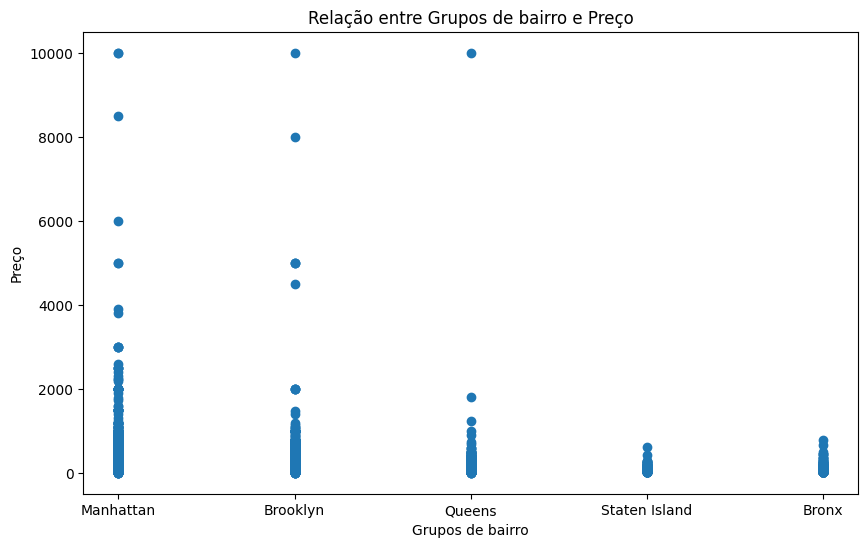

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data_final['bairro_grupo'], data_final['preco'])
plt.xlabel('Grupos de bairro')
plt.ylabel('Preço')
plt.title('Relação entre Grupos de bairro e Preço')
plt.show()


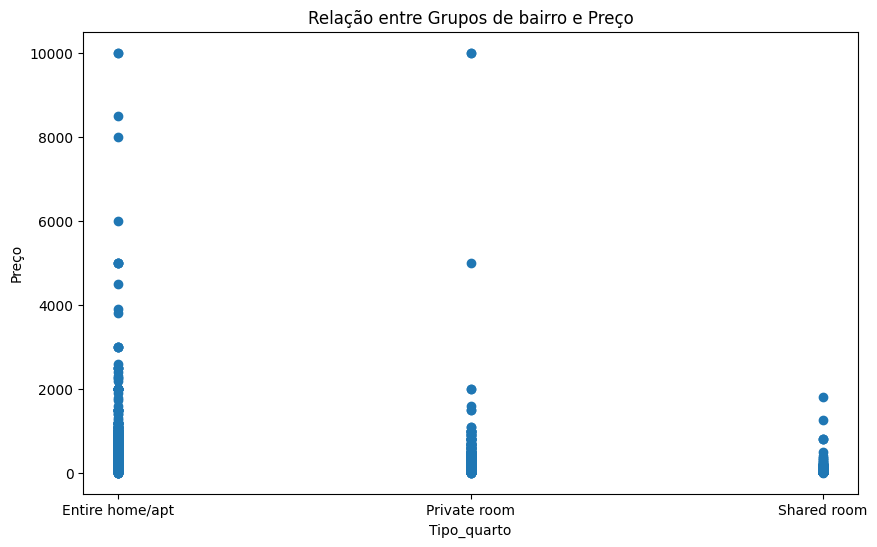

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data_final['tipo_quarto'], data_final['preco'])
plt.xlabel('Tipo_quarto')
plt.ylabel('Preço')
plt.title('Relação entre Grupos de bairro e Preço')
plt.show()

In [ ]:
private_room = data[data['tipo_quarto'] == 'Private room'].groupby('bairro_grupo')['tipo_quarto'].count()

# Encontrar o grupo de bairro com a maior contagem de quartos privados
bairro = private_room.idxmax()
maior_concentracao_p = private_room.max()

print(f'O grupo de bairro com a maior concentração de quartos privados é "{bairro}", com {maior_concentracao_p} quartos privados.')


O grupo de bairro com a maior concentração de quartos privados é "Brooklyn", com 7983 quartos privados.


In [ ]:
shared_room = data[data['tipo_quarto'] == 'Shared room'].groupby('bairro_grupo')['tipo_quarto'].count()

# Encontrar o grupo de bairro com a maior contagem de quartos privados
bairro_shared_room = shared_room.idxmax()
maior_concentracao_s = shared_room.max()

print(f'O grupo de bairro com a maior concentração de quartos compartilhados é "{bairro_shared_room}", com {maior_concentracao_s} quartos compartilhados.')


O grupo de bairro com a maior concentração de quartos compartilhados é "Manhattan", com 356 quartos compartilhados.


In [ ]:
entire_home =data[data['tipo_quarto'] == 'Entire home/apt'].groupby('bairro_grupo')['tipo_quarto'].count()

bairro_entire_home = entire_home.idxmax()
maior_concentracao_e = entire_home.max()

print(f'O grupo de bairro com a maior concentração de lugares do tipo entire_home/apt é "{bairro_entire_home}", com {maior_concentracao_e} entire home')

O grupo de bairro com a maior concentração de lugares do tipo entire_home/apt é "Manhattan", com 9962 entire home


### boxplot

In [ ]:
# Construção do Boxplot para variável price.
data_final['preco'].plot(kind='box', vert=False, figsize=(15, 3))

plt.show()

preco_max= len(data_final.query('preco >= 1000'))
print(f"Há {preco_max} lugares com preços maiores que 1000.")

preco_min = len(data_final.query('preco <= 600'))
print(f"Há {preco_min} lugares com preços menores ou igual a 600.")



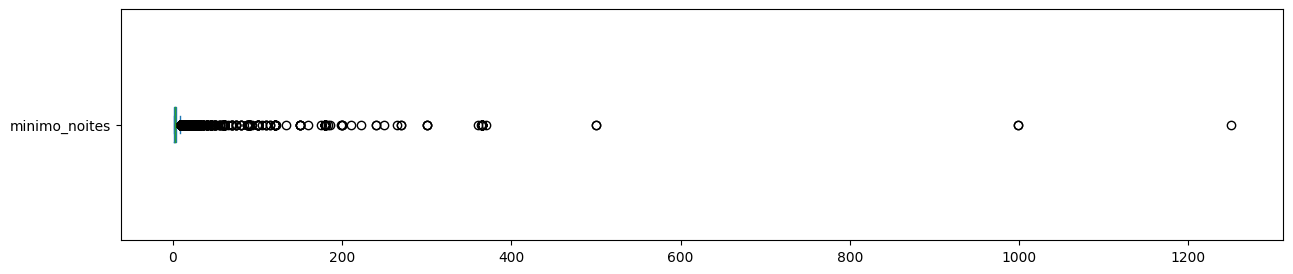

Há 32073 lugares com  30 dias ou menos para reservar.
Há 90 lugares com 100 dias ou mais para reservar.


In [ ]:
data['minimo_noites'].plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

min_noites = len(data_final.query('minimo_noites <= 30'))
print(f"Há {min_noites} lugares com  30 dias ou menos para reservar.")

max_noites = len(data_final.query('minimo_noites >= 100'))
print(f"Há {max_noites} lugares com 100 dias ou mais para reservar.")

### Criação de novo dataframe

In [ ]:
novo_data = data_final.copy()
novo_data.drop(novo_data[novo_data.preco > 1000].index, axis=0, inplace=True)
novo_data.drop(novo_data[novo_data.minimo_noites >= 100].index, axis=0, inplace=True)


In [ ]:
novo_data.corr()

<ipython-input-64-8dca1d007fa1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  novo_data.corr()


,latitude,longitude,preco,minimo_noites,numero_avaliacoes,reviews_por_mes,contagem_listas_hosts,disponibilidade_365,tipo_quarto_Entire home/apt,tipo_quarto_Private room,tipo_quarto_Shared room
latitude,1.000000,0.093902,0.042870,0.040883,-0.007428,-0.019008,0.046806,-0.027074,0.001707,-0.001265,-0.001548
longitude,0.093902,1.000000,-0.247296,-0.080237,0.067278,0.150001,-0.049856,0.120773,0.001756,-0.002539,0.002689
preco,0.042870,-0.247296,1.000000,0.021785,-0.033126,-0.059953,0.064437,0.082074,-0.009675,0.009583,0.000421
minimo_noites,0.040883,-0.080237,0.021785,1.000000,-0.145276,-0.196234,0.355912,0.184534,-0.001735,0.003659,-0.006637
numero_avaliacoes,-0.007428,0.067278,-0.033126,-0.145276,1.000000,0.719074,-0.071175,0.238393,0.028578,-0.023323,-0.018465
reviews_por_mes,-0.019008,0.150001,-0.059953,-0.196234,0.719074,1.000000,-0.069333,0.199591,-0.003389,0.001683,0.005936
contagem_listas_hosts,0.046806,-0.049856,0.064437,0.355912,-0.071175,-0.069333,1.000000,0.222722,-0.017287,0.017231,0.000371
disponibilidade_365,-0.027074,0.120773,0.082074,0.184534,0.238393,0.199591,0.222722,1.000000,0.015487,-0.012138,-0.011740
tipo_quarto_Entire home/apt,0.001707,0.001756,-0.009675,-0.001735,0.028578,-0.003389,-0.017287,0.015487,1.000000,-0.958321,-0.154439
tipo_quarto_Private room,-0.001265,-0.002539,0.009583,0.003659,-0.023323,0.001683,0.017231,-0.012138,-0.958321,1.000000,-0.134263


In [ ]:
data_final.corr()

<ipython-input-65-32f8f7c69672>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_final.corr()


,latitude,longitude,preco,minimo_noites,numero_avaliacoes,reviews_por_mes,contagem_listas_hosts,disponibilidade_365,tipo_quarto_Entire home/apt,tipo_quarto_Private room,tipo_quarto_Shared room
latitude,1.000000,0.093619,0.027610,0.026281,-0.007941,-0.019499,0.047100,-0.025938,0.002042,-0.001463,-0.002019
longitude,0.093619,1.000000,-0.144995,-0.055032,0.068092,0.150867,-0.049773,0.117322,0.001794,-0.002350,0.001902
preco,0.027610,-0.144995,1.000000,0.030470,-0.031876,-0.048190,0.031053,0.063620,-0.018982,0.018809,0.000793
minimo_noites,0.026281,-0.055032,0.030470,1.000000,-0.080939,-0.114392,0.171379,0.114673,0.007517,-0.007768,0.000790
numero_avaliacoes,-0.007941,0.068092,-0.031876,-0.080939,1.000000,0.719398,-0.071085,0.235128,0.028488,-0.023110,-0.018850
reviews_por_mes,-0.019499,0.150867,-0.048190,-0.114392,0.719398,1.000000,-0.069314,0.196223,-0.003484,0.001924,0.005418
contagem_listas_hosts,0.047100,-0.049773,0.031053,0.171379,-0.071085,-0.069314,1.000000,0.222012,-0.017034,0.016940,0.000502
disponibilidade_365,-0.025938,0.117322,0.063620,0.114673,0.235128,0.196223,0.222012,1.000000,0.015194,-0.012185,-0.010539
tipo_quarto_Entire home/apt,0.002042,0.001794,-0.018982,0.007517,0.028488,-0.003484,-0.017034,0.015194,1.000000,-0.958132,-0.154782
tipo_quarto_Private room,-0.001463,-0.002350,0.018809,-0.007768,-0.023110,0.001924,0.016940,-0.012185,-0.958132,1.000000,-0.134574


Ao realizar o tratamento dos dados, em que retirou-se os outliers das variáveis "preço" e "minimo_noites", houve um crescimento na correlação das variáveis, no entanto, a correlação ainda é considerada baixa.

## Responda também às seguintes perguntas:

a. Supondo que uma pessoa esteja pensando em investir em um
apartamento para alugar na plataforma, onde seria mais indicada a
compra?

b. O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

c. Existe algum padrão no texto do nome do local para lugares de mais
alto valor?


**Onde seria mais indicada a compra ?**   


In [ ]:
quantidade_bairros_unicos = data_final['bairro'].nunique()

quantidade_bairros_unicos


218

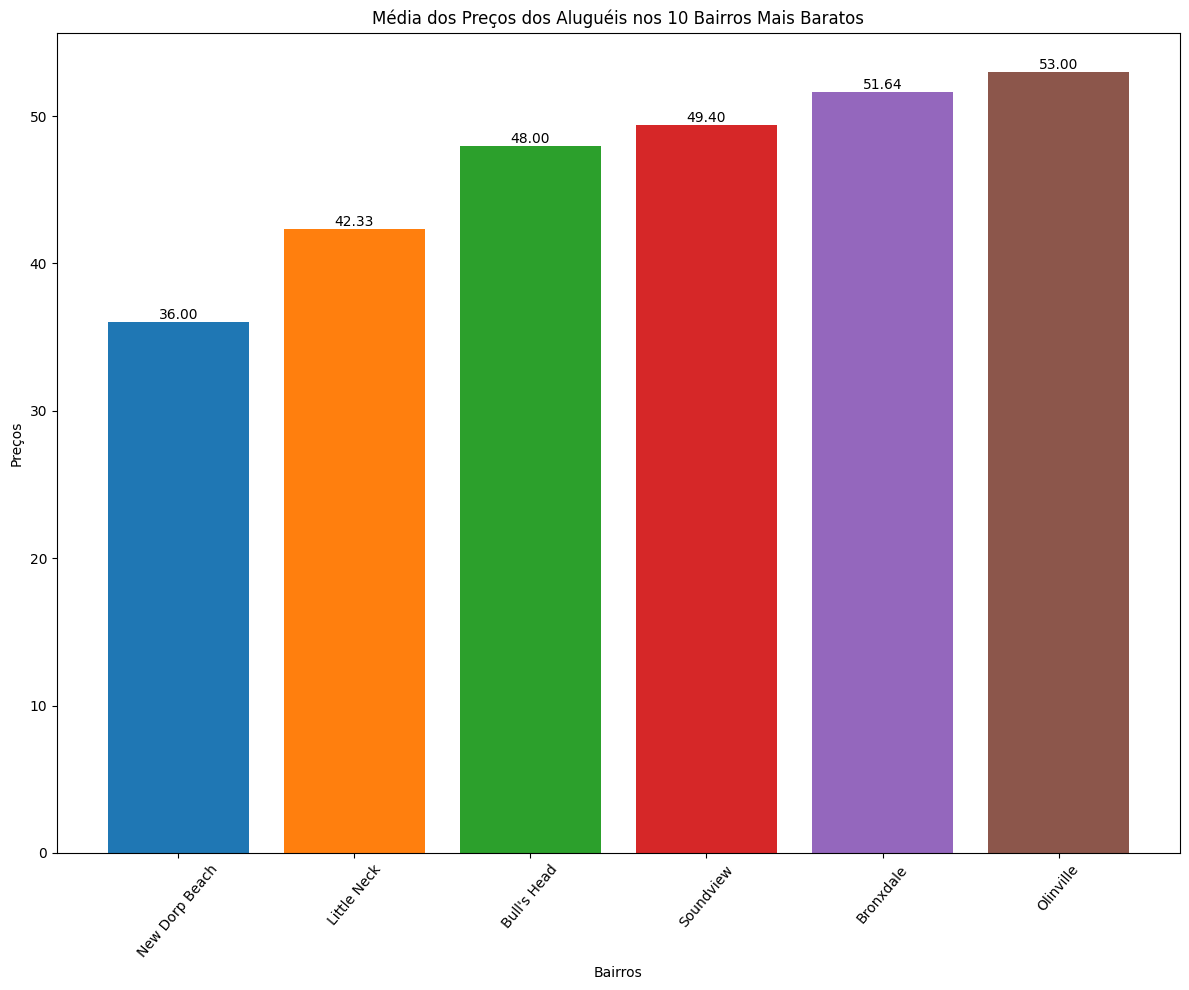

In [ ]:
import matplotlib.pyplot as plt

# Calcular a média dos bairros com os preços mais baixos
media_bairros_baratos = data_final.groupby('bairro')['preco'].mean().nsmallest(6)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

fig, ax = plt.subplots(figsize=(12, 10))

# Usar plot() com o índice e os valores de 'media_bairros_baratos'
ax.bar(media_bairros_baratos.index, media_bairros_baratos.values, color=colors)
ax.set_xlabel('Bairros')
ax.set_ylabel('Preços')
ax.set_title('Média dos Preços dos Aluguéis nos 10 Bairros Mais Baratos')

# Adicionar anotações aos valores de preço
for i, preco in enumerate(media_bairros_baratos.values):
    ax.annotate(f'{preco:.2f}', (i, preco), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=50)
plt.tight_layout()
plt.show()



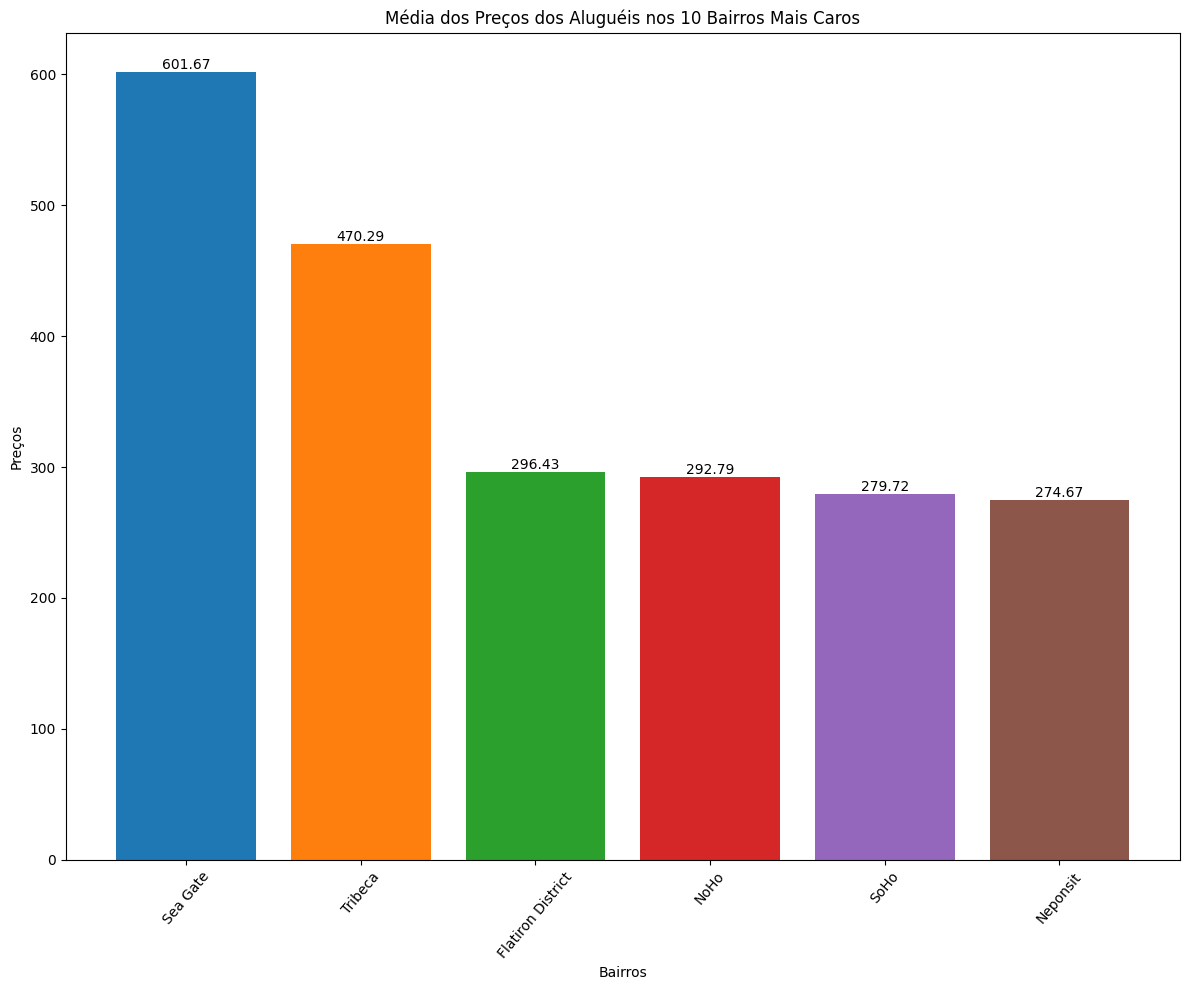

In [ ]:
import matplotlib.pyplot as plt


media_bairros_caros = data_final.groupby('bairro')['preco'].mean().nlargest(6)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

fig, ax = plt.subplots(figsize=(12, 10))

ax.bar(media_bairros_caros.index, media_bairros_caros.values, color=colors)
ax.set_xlabel('Bairros')
ax.set_ylabel('Preços')
ax.set_title('Média dos Preços dos Aluguéis nos 10 Bairros Mais Caros')

# Adicionar anotações aos valores de preço
for i, preco in enumerate(media_bairros_caros.values):
    ax.annotate(f'{preco:.2f}', (i, preco), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

In [ ]:
media_bairros_caros = data_final.groupby('bairro')['preco'].mean().nlargest(5)

# Calcular a média dos aluguéis nos 5 bairros mais caros
media_alugueis_caros = media_bairros_caros.mean()

media_alugueis_caros

388.17781411689987

**NY- distritos**

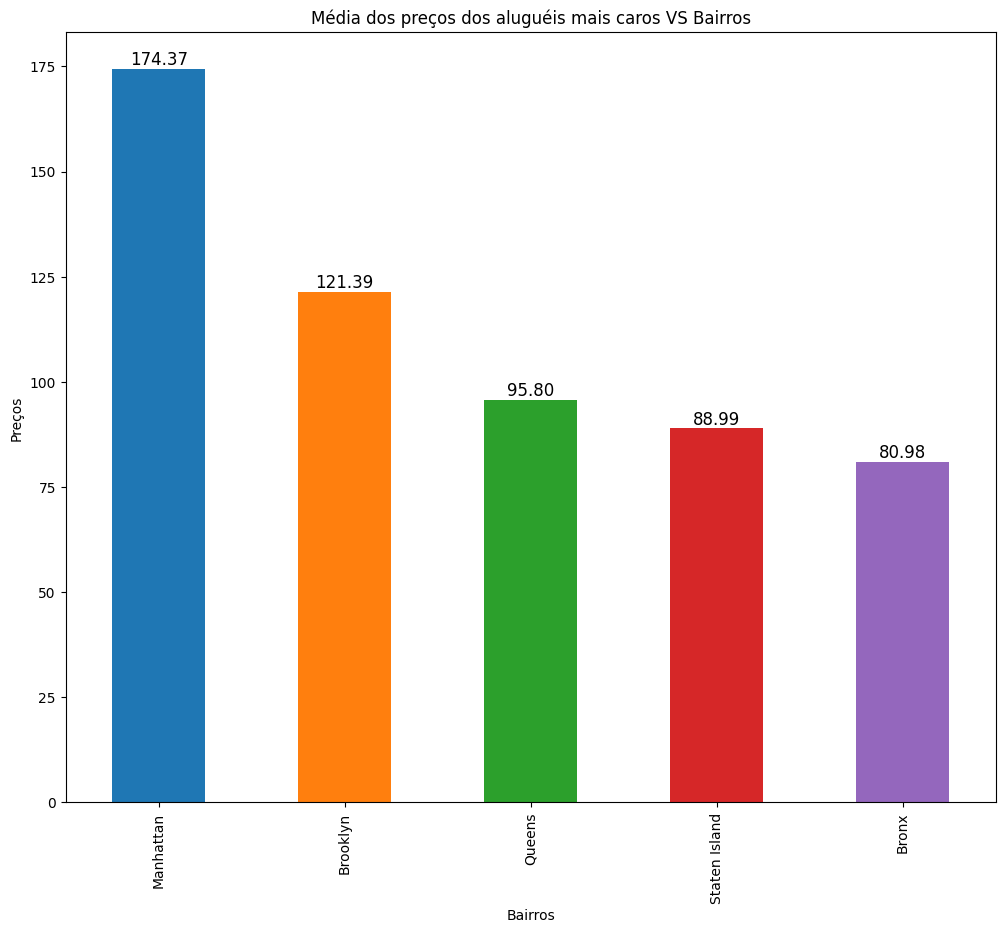

In [ ]:

media_bairro_caro = data_final.groupby('bairro_grupo')['preco'].mean().sort_values(ascending=False)[:6]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

fig, ax = plt.subplots(figsize=(12, 10))

media_bairro_caro.plot(kind= 'bar', ax=ax, color= colors)
ax.set_xlabel('Bairros')
ax.set_ylabel('Preços')
ax.set_title('Média dos preços dos aluguéis mais caros VS Bairros')

for i, (bairro, preco) in enumerate(media_bairro_caro.items()):
    ax.annotate(f'{preco:.2f}', (i, preco), ha='center', va='bottom', fontsize=12)


plt.show()


*  De acordo com a visualização da média de preços dos aluguéis , é válido dizer que o investimento em alugar um apartamento pode variar dependendo da condição de cada indivíduo(o quanto pode investir), público-alvo.
*  Em uma situação em que um indivíduo pretende alugar em um lugar mais barato , pode-se indicar os 1 dos bairros mostrados no gráfico "Média dos Preços dos Aluguéis mais barato VS Bairro "
*   Em vista dos bairros citados com a menor valor de precificação dos aluguéis, os indivíduos que querem não possuem um valor alto para investir em aluguel nesses locais, mas que podem não ter boas condições de segurança pública ou que podem ser distantes de centros turísticos importantes da cidade de New York.
*   Em vista dos bairros citados com a maior média de precificação de aluguel, os indivíduos que tiverem um valor alto em aluguel podem prefirir e escolher esses locais, em que estes podem ser considerados locais com boa qualidade na segurança pública e perto de locais importantes e turísticos na cidade de New York.




****

**O número mínimo de noites e a disponibilidade intereferem no preço?**


In [ ]:
correlacao_noite_disponibilidade_preco = data[['preco', 'minimo_noites', 'disponibilidade_365']].corr()

print(correlacao_noite_disponibilidade_preco)

                        preco  minimo_noites  disponibilidade_365
preco                1.000000       0.025533             0.078314
minimo_noites        0.025533       1.000000             0.101680
disponibilidade_365  0.078314       0.101680             1.000000


De acordo com o valores de correlação entre as variáveis, há uma baixa relação entre o número mínimo de noites e o preço do imóvel e entre a disponibilidade do imóvel e o preço.

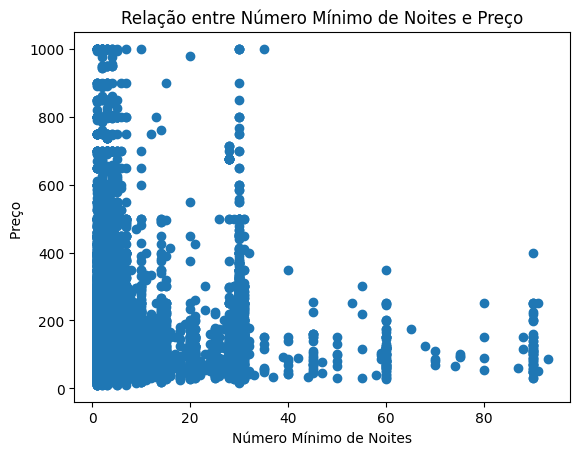

In [ ]:
# Visualização de dados mínimo de noites e preço
plt.scatter(novo_data['minimo_noites'], novo_data['preco'])
plt.xlabel('Número Mínimo de Noites')
plt.ylabel('Preço ')
plt.title('Relação entre Número Mínimo de Noites e Preço')
plt.show()

De acordo com o gráfico acima percebe-se que a relação entre a variável "preço" e a variável "disponibilidade_365"

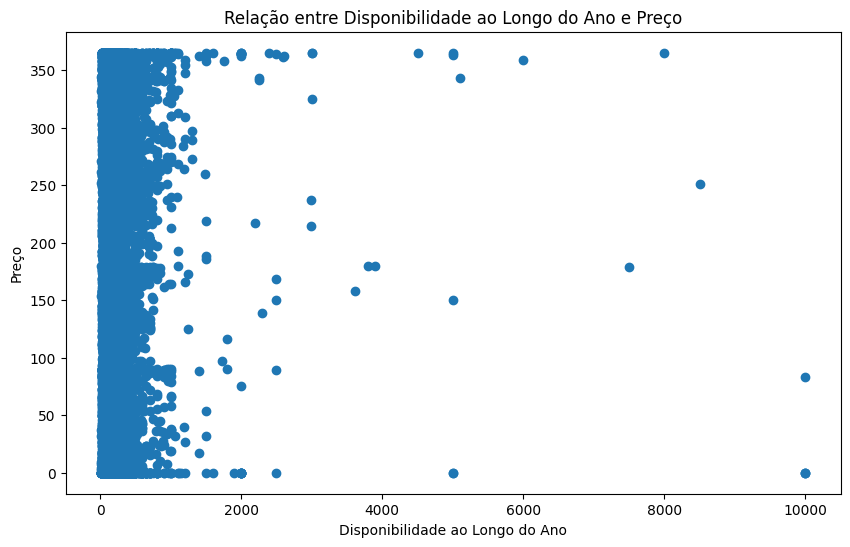

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['preco'], data['disponibilidade_365'])
plt.xlabel('Disponibilidade ao Longo do Ano')
plt.ylabel('Preço')
plt.title('Relação entre Disponibilidade ao Longo do Ano e Preço')
plt.show()

## Separação em dados de teste e treinamento

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop(columns=['preco'])  # variável previsora - preço. classes - outras
y = data['preco']

In [ ]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X,y,test_size = 0.15,random_state = 0)

In [ ]:
X_treinamento.shape,y_treinamento.shape

((33002, 12), (33002,))

In [ ]:
X_teste.shape,y_teste.shape

((5824, 12), (5824,))

## Codificação de variáveis categóricas:


In [ ]:
data.select_dtypes(include='object').describe()

,nome,bairro_grupo,bairro,tipo_quarto,ultima_review
count,38826,38826,38826,38826,38826
unique,38258,5,218,3,1764
top,Home away from home,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,12,16628,3162,20326,1412


## Salvar variáveis

In [ ]:
import pickle

In [ ]:
with open('precificacao.pkl',mode='wb')as f:
  pickle.dump([X_treinamento,y_treinamento,X_teste,y_teste],f)

## SVM




In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
svm = SVC(kernel='rbf', random_state=1, C = 2.0)
svm.fit(X_treinamento, y_treinamento)

ValueError: could not convert string to float: 'Cozy room in Prime Williamsburg'

In [ ]:
naive_risco_credito.classes_